In [1]:
from carUtils import *
from linesUtils import *
import scipy.stats
import glob

In [2]:
Noise_specs={"sensor noise":5 #% error in sensor noise (max)
             "sensor noise distribution": scipy.stats.uniform #we use a uniform distribution rn (maybe fun to change)
             "motor noise": 1 #% error between what the input of the motor percentage to the output of the motor percentage
             "motor noise ditribution":scipy.stats.normal #use a normal distribution rn (must be centered around 0, percentage would be std)
            }

SyntaxError: invalid syntax (Temp/ipykernel_12848/3109276990.py, line 2)

In [ ]:
class Env:
    def __init__(self,Car_specs=Car_specs,save_folder="Runs",Noise_specs=Noise_specs,measurments):
        """
        Initializes the car according to the Car_specs, and noise_specs
        """
        #this may or may not be necessary since maybe the trainer will make the file
        #also assume the trainer will seed
        if not os.path.exists(save_folder):
            os.makedirs(save_folder)
            
        #init car accor

In [4]:
T=[]
X=[[],[],[],[],[],[],[],[]]
for file in glob.glob("measurements/*.npy"):
    t=int(file[len("measurements\\measurment"):-4])
    raw_data=np.load(file)
    T+=[t]*raw_data.shape[0]
    for i in range(8):
        X[i]+=list(raw_data[:,i])
        #print(raw_data[:,i].shape)
    
X=np.array(X)
#X=X[X>0]
T=np.array(T)

In [5]:
T=T[np.all(X<=2500,axis=0)]
X=X[:,np.all(X<=2500,axis=0)]


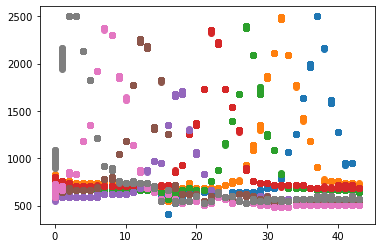

In [6]:
for i in range(8):
    plt.plot(T,X[i,:],"o")

In [30]:
import sklearn.svm

m=sklearn.svm.SVR(kernel="rbf").fit(T.reshape(-1, 1),X[7,:])

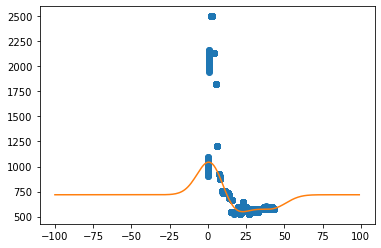

In [32]:

plt.plot(T,X[7,:],"o")
plt.plot(np.arange(-100,100),m.predict(np.arange(-100,100).reshape(-1, 1)))

In [69]:
Car_specs

{'diameter': 16.3,
 'wheel_distance': 7.45,
 'wheel diameter': 7.2,
 'num_sensors': 8,
 'sensor_array_distance': 2.6030000000000006,
 'sensor_spacing': 0.953}

In [83]:
sensor_locs=Car_specs['sensor_spacing']*3.5-np.arange(Car_specs['num_sensors'])*Car_specs['sensor_spacing']

In [84]:
line_locs=-4+T*0.2
np.max(line_locs)

4.6

In [85]:
np.min(line_locs)

-4.0

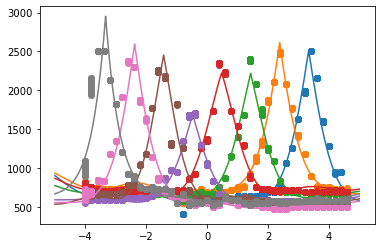

In [110]:
from sklearn.neighbors import KNeighborsRegressor

t=np.arange(-5,5,0.001)
for i in range(8):
    x=np.abs(line_locs-sensor_locs[i])
    
    model=sklearn.svm.SVR().fit(x.reshape(-1, 1),np.log(X[i,:]))

    p=plt.plot(line_locs,X[i,:],"o")

    plt.plot(t,np.exp(model.predict(np.abs(t-sensor_locs[i]).reshape(-1, 1))),color=p[0].get_color())

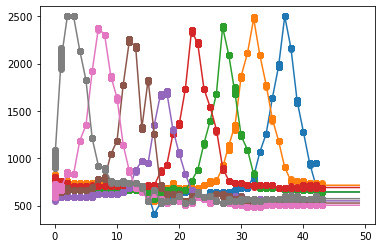

In [111]:
from sklearn.neighbors import KNeighborsRegressor

t=np.arange(0,50)
for i in range(8):
    model=KNeighborsRegressor(n_neighbors=5,weights='distance').fit(T.reshape(-1, 1),np.log(X[i,:]))

    p=plt.plot(T,X[i,:],"o")

    plt.plot(t,np.exp(model.predict(t.reshape(-1, 1))),color=p[0].get_color())

In [66]:
p[0]

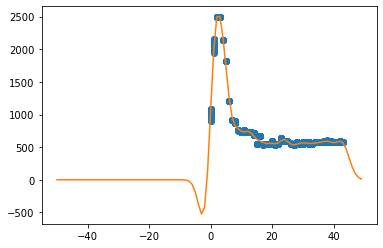

In [54]:
from sklearn.kernel_ridge import KernelRidge

model=KernelRidge(kernel='rbf', gamma=0.1).fit(T.reshape(-1, 1),X[7,:])

plt.plot(T,X[7,:],"o")
t=np.arange(-50,50)
plt.plot(t,model.predict(t.reshape(-1, 1)))

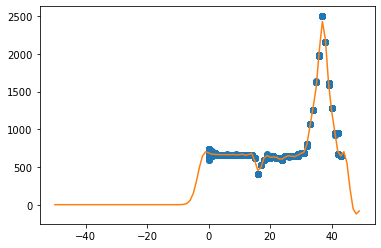

In [60]:
from sklearn.kernel_ridge import KernelRidge

model=KernelRidge(kernel='rbf', gamma=0.1,alpha=0.01).fit(T.reshape(-1, 1),X[0,:])

plt.plot(T,X[0,:],"o")
t=np.arange(-50,50)
plt.plot(t,model.predict(t.reshape(-1, 1)))

In [38]:
raw_data.shape

(97, 8)